In [1]:
! pip3 install matplotlib
! pip3 install tensorflow-addons
! pip3 install pandas
! pip3 install pendulum
! pip3 install keras_tuner
import os
import pendulum
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

     |████████████████████████████████| 11.3 MB 13.6 MB/s eta 0:00:01    |████▌                           | 1.6 MB 13.6 MB/s eta 0:00:01     |██████████████▌                 | 5.1 MB 13.6 MB/s eta 0:00:01     |██████████████████████▉         | 8.0 MB 13.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 43.8 MB/s eta 0:00:01
     |████████████████████████████████| 890 kB 15.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 2.5 MB/s eta 0:00:01     |███████████                     | 1.5 MB 2.5 MB/s eta 0:00:02
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 11.5 MB 17.7 MB/s eta 0:00:01    |█████▍                          | 2.0 MB 17.7 MB/s eta 0:00:01     |█████████                       | 3.2 MB 17.7 MB/s eta 0:00:01     |██████████████▎                 | 5.1 MB 17.7 MB/s eta 0

In [2]:
from residualmlp.residual_mlp import ResidualMLP

In [3]:


# Read the California housing data. 
df = pd.read_csv("https://storage.googleapis.com/ml_universities/california_housing_train.csv", sep=",")



In [4]:


# Let's see what this looks like.
# In the real world, data would never be this clean... 
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [10]:
# pseudo quasi random numbers between 0 and 1. 
# ~ 80% of them should be below .8 
msk = np.random.rand(len(df)) < 0.8
traindf = df[msk]
evaldf = df[~msk]
traindf.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0


In [11]:
# Pull label from df
y_train = traindf.pop('median_house_value')

In [12]:


# Convert label to a numpy array
y_train = y_train.to_numpy()



In [13]:


# Pull label from df
y_eval = evaldf.pop('median_house_value')



In [14]:


# Convert label to a numpy array
y_eval = y_eval.to_numpy()



In [15]:
# Convert data - the features to a numpy array
x_train = traindf.to_numpy()

In [16]:
# Convert data - the features to a numpy array
x_eval = evaldf.to_numpy()


In [4]:

# Set the hyperparameters for the  

PROBLEM_TYPE = 'regression'
LEARNING_RATE = 0.07
MINIMUM_LEARNING_RATE = .00003
MAXIMUM_LEARNING_RATE = .07
NUMBER_OF_LEARNING_RATES_TO_TRY = 5
INPUT_SHAPE = 8
BASE_MODEL = ''
BASE_MODEL_INPUT_SHAPE = None
FLATTEN = False
BLOCKS = [[5,12,2],[5,12,2]]7624369664
MINIMUM_NUMBER_OF_BLOCKS = 2
MAXIMUM_NUMBER_OF_BLOCKS = 3
MINIMUM_NEURONS_PER_BLOCK_LAYER = 4
MAXIMUM_NEURONS_PER_BLOCK_LAYER = 25
MINIMUM_NEURONS_PER_BLOCK_LAYER_DECAY = 0
MAXIMUM_NEURONS_PER_BLOCK_LAYER_DECAY = 5
RESIDUAL_BYPASS_DENSE_LAYERS = [[3],[3]]
B_NORM_OR_DROPOUT_RESIDUAL_BYPASS_LAYERS = 'dropout'
#MINIMUM_DROPOUT_RATE_FOR_BYPASS_LAYERS
#MAXIMIM_DROPOUT_RATE_FOR_BYPASS_LAYERS
#N_OPTIONS_DROPOUT_RATE_FOR_BYPASS_LAYERS
DROPOUT_RATE_FOR_BYPASS_LAYERS = 0.5
# INTER_BLOCK_LAYERS_PER_BLOCK # = "[5,3]" leaving default.
#MINIMUM_INTER_BLOCK_LAYERS_PER_BLOCK
#MAXIMUM_INTER_BLOCK_LAYERS_PER_BLOCK
#N_OPTIONS_INTER_BLOCK_LAYERS_PER_BLOCK
B_NORM_OR_DROPOUT_LAST_LAYERS = 'bnorm'
DROPOUT_RATE = 0.0
#MINIMUM_DROPOUT_RATE
#MAXIMUM_DROPOUT_RATE
#N_OPTIONS_DROPOUT_RATE
FINAL_DENSE_LAYERS = []
#MINIMUM_FINAL_DENSE_LAYERS
#MAXIMUM_FINAL_DENSE_LAYERS
#N_OPTIONS_FINAL_DENSE_LAYERS
NUMBER_OF_CLASSES = 1
FINAL_ACTIVATION = None
LOSS = tf.keras.losses.MeanSquaredError()



In [13]:
#New hyperparameters: Left default:
#minimum_dropout_rate_for_bypass_layers
#maximim_dropout_rate_for_bypass_layers
#n_options_dropout_rate_for_bypass_layers
#minimum_inter_block_layers_per_block
#maximum_inter_block_layers_per_block 
#n_options_inter_block_layers_per_block
#minimum_dropout_rate
#maximum_dropout_rate 
#n_options_dropout_rate
#minimum_final_dense_layers 
#maximum_final_dense_layers 
#n_options_final_dense_layers

res_mlp = ResidualMLP(problem_type = PROBLEM_TYPE,
                      learning_rate=LEARNING_RATE,
                      minimum_learning_rate = MINIMUM_LEARNING_RATE,
                      maximum_learning_rate = MAXIMUM_LEARNING_RATE,
                      number_of_learning_rates_to_try = NUMBER_OF_LEARNING_RATES_TO_TRY,
                      input_shape = INPUT_SHAPE,  
                      base_model= BASE_MODEL,
                      base_model_input_shape = BASE_MODEL_INPUT_SHAPE,
                      flatten_after_base_model = FLATTEN,
                      blocks = BLOCKS,
                      minimum_number_of_blocks = MINIMUM_NUMBER_OF_BLOCKS,
                      maximum_number_of_blocks = MAXIMUM_NUMBER_OF_BLOCKS,
                      minimum_neurons_per_block_layer = MINIMUM_NEURONS_PER_BLOCK_LAYER,
                      maximum_neurons_per_block_layer = MAXIMUM_NEURONS_PER_BLOCK_LAYER,
                      minimum_neurons_per_block_layer_decay = MINIMUM_NEURONS_PER_BLOCK_LAYER_DECAY,
                      maximum_neurons_per_block_layer_decay = MAXIMUM_NEURONS_PER_BLOCK_LAYER_DECAY,
                      residual_bypass_dense_layers = RESIDUAL_BYPASS_DENSE_LAYERS,
                      b_norm_or_dropout_residual_bypass_layers= B_NORM_OR_DROPOUT_RESIDUAL_BYPASS_LAYERS,
                      dropout_rate_for_bypass_layers=DROPOUT_RATE_FOR_BYPASS_LAYERS,
                      # inter_block_layers_per_block = INTER_BLOCK_LAYERS_PER_BLOCK,
                      b_norm_or_dropout_last_layers=B_NORM_OR_DROPOUT_LAST_LAYERS,
                      dropout_rate=DROPOUT_RATE,
                      final_dense_layers =\
                          FINAL_DENSE_LAYERS,
                      number_of_classes = NUMBER_OF_CLASSES,
                      final_activation = FINAL_ACTIVATION,
                      loss = LOSS)


In [14]:
date = pendulum.now().__str__()[:16].replace("T","_").replace(":","_")

RESULTS_DIR = f'simple-ResidualMLP_regressor_{date}'
PATIENCE = 10
PATIENCE_MIN_DELTA = 0.00001
BATCH_SIZE = 300
EPOCHS = 100

logdir = os.path.join("logs", RESULTS_DIR + "_TB")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

2022-01-20 05:04:15.051459: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-01-20 05:04:15.051503: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-01-20 05:04:15.123341: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-01-20 05:04:15.133012: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-01-20 05:04:15.133229: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1749] CUPTI activity buffer flushed


In [15]:
tuner = kt.Hyperband(
    res_mlp.build_auto_residual_mlp,
    objective='val_loss',
    max_epochs = 30,
    hyperband_iterations = 2)
tuner.search(x=x_train,  
                    y=y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE, 
             callbacks=[
                    tf.keras.callbacks.EarlyStopping(
                        monitor="val_loss",
                        patience=PATIENCE,
                        min_delta=PATIENCE_MIN_DELTA,
                        restore_best_weights=True,
                    ),
                    tensorboard_callback,
                ],
             validation_split=0.3)

Trial 180 Complete [00h 00m 23s]
val_loss: 14955311104.0

Best val_loss So Far: 7687736320.0
Total elapsed time: 00h 41m 16s
INFO:tensorflow:Oracle triggered exit


In [16]:
best_model = tuner.get_best_models(num_models=10)

All permutations:
     number_of_blocks  layers_per_block  neurons_per_block_layer  \
0                   2                 1                        4   
1                   2                 1                        4   
2                   2                 1                        4   
3                   2                 1                        4   
4                   2                 1                        4   
..                ...               ...                      ...   
583                 3                 7                       25   
584                 3                 7                       25   
585                 3                 7                       25   
586                 3                 7                       25   
587                 3                 7                       25   

     neurons_per_block_layer_decay  
0                                0  
1                                1  
2                                2  
3                

In [17]:
#
# Optimal model:
# Hyperparameters:

# learning_rate: 0.03272329429801146
# blocks: 23 ([[1, 14, 5], [1, 14, 5]])
# bypass_layers_units: 11
# inter_block_layers: 25
# final_dense_layers: 30
# b_norm_or_dropout_residual_bypass_layers: bnorm
# dropout_rate_for_bypass_layers: 0.7
# b_norm_or_dropout_last_layers: dropout
# dropout_rate: 0.01
# tuner/epochs: 30
# tuner/initial_epoch: 10

In [18]:
tuner.get_best_hyperparameters()


In [19]:
tuner.results_summary(num_trials=10)

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
learning_rate: 0.03272329429801146
blocks: 23
bypass_layers_units: 11
inter_block_layers: 25
final_dense_layers: 30
b_norm_or_dropout_residual_bypass_layers: bnorm
dropout_rate_for_bypass_layers: 0.7
b_norm_or_dropout_last_layers: dropout
dropout_rate: 0.01
tuner/epochs: 30
tuner/initial_epoch: 10
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: fb23800d77e621efbe21493e9ba5c65b
Score: 7687736320.0
Trial summary
Hyperparameters:
learning_rate: 0.06261237967600675
blocks: 5
bypass_layers_units: 18
inter_block_layers: 30
final_dense_layers: 30
b_norm_or_dropout_residual_bypass_layers: bnorm
dropout_rate_for_bypass_layers: 0.7
b_norm_or_dropout_last_layers: dropout
dropout_rate: 0.7
tuner/epochs: 30
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 7993523200.0
Trial summary
Hyperparameters:
learning_rate: 0.026958445809844658
blocks: 85

In [7]:
best_model_remake = ResidualMLP(problem_type = PROBLEM_TYPE,
                      learning_rate=0.0327,
                      #minimum_learning_rate = MINIMUM_LEARNING_RATE,
                      #maximum_learning_rate = MAXIMUM_LEARNING_RATE,
                      #number_of_learning_rates_to_try = NUMBER_OF_LEARNING_RATES_TO_TRY,
                      input_shape = INPUT_SHAPE,  
                      base_model= BASE_MODEL,
                      base_model_input_shape = BASE_MODEL_INPUT_SHAPE,
                      flatten_after_base_model = FLATTEN,
                      blocks = [[1, 14, 5], [1, 14, 5]], # BLOCKS,
                      #minimum_number_of_blocks = MINIMUM_NUMBER_OF_BLOCKS,
                      #maximum_number_of_blocks = MAXIMUM_NUMBER_OF_BLOCKS,
                      #minimum_neurons_per_block_layer = MINIMUM_NEURONS_PER_BLOCK_LAYER,
                      #maximum_neurons_per_block_layer = MAXIMUM_NEURONS_PER_BLOCK_LAYER,
                      #minimum_neurons_per_block_layer_decay = MINIMUM_NEURONS_PER_BLOCK_LAYER_DECAY,
                      #maximum_neurons_per_block_layer_decay = MAXIMUM_NEURONS_PER_BLOCK_LAYER_DECAY,
                      residual_bypass_dense_layers = [[11],[11]], # RESIDUAL_BYPASS_DENSE_LAYERS,
                      b_norm_or_dropout_residual_bypass_layers= 'bnorm',
                      dropout_rate_for_bypass_layers=DROPOUT_RATE_FOR_BYPASS_LAYERS,
                      inter_block_layers_per_block = [25],
                      b_norm_or_dropout_last_layers='dropout',
                      dropout_rate=0.01,
                      final_dense_layers =\
                          [30],
                      number_of_classes = NUMBER_OF_CLASSES,
                      final_activation = FINAL_ACTIVATION,
                      loss = LOSS)
final_model = best_model_remake.make_tandem_model()

In [8]:
date = pendulum.now().__str__()[:16].replace("T","_").replace(":","_")

RESULTS_DIR = f'final-simple-ResidualMLP_regressor_{date}'
PATIENCE = 10
PATIENCE_MIN_DELTA = 0.00001
BATCH_SIZE = 300
EPOCHS = 100

logdir = os.path.join("logs", RESULTS_DIR + "_TB")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

2022-01-20 06:10:14.756194: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-01-20 06:10:14.756828: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-01-20 06:10:14.759514: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [17]:


history = final_model.fit(x=x_train,  
                    y=y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=30,      
                    verbose='auto', 
                    callbacks=[tf.keras.callbacks.\
                               EarlyStopping(monitor='val_loss',
                                             patience=PATIENCE,
                                             min_delta=PATIENCE_MIN_DELTA,
                                             restore_best_weights=True),
                            tensorboard_callback], 
                    validation_split=0.3, 
                    validation_data=None, 
                    shuffle=True,
                    class_weight=None, 
                    sample_weight=None, 
                    initial_epoch=0, 
                    steps_per_epoch=None, 
                    validation_steps=None, 
                    validation_batch_size=10, 
                    validation_freq=1, 
                    max_queue_size=10, 
                    workers=5, 
                    use_multiprocessing=True)



2022-01-20 06:12:15.065500: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
 6/32 [====>.........................] - ETA: 2s - loss: 53000347648.0000 - root_mean_squared_error: 230218.0469 - mean_absolute_error: 200000.0156

2022-01-20 06:12:22.208050: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-01-20 06:12:22.208710: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-01-20 06:12:22.220850: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-20 06:12:22.229890: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-01-20 06:12:22.292611: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/final-simple-ResidualMLP_regressor_2022-01-20_06_10_TB/train/plugins/profile/2022_01_20_06_12_22

2022-01-20 06:12:22.297916: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/final-simple-ResidualMLP_regressor_2022-01-20_06_10_TB/train/plugins/profile/2022_01_20_06_12_22/n4fqjedwbs.trace.json.gz
2022-01-20 06:12:22.318519: I tensorflow/core/profiler/rpc/client/save_profi

32/32 [==============================] - 10s 95ms/step - loss: 52523515904.0000 - root_mean_squared_error: 229180.0938 - mean_absolute_error: 199460.5469 - val_loss: 66305314816.0000 - val_root_mean_squared_error: 257498.1875 - val_mean_absolute_error: 226754.9375
Epoch 2/30
32/32 [==============================] - 2s 58ms/step - loss: 51746930688.0000 - root_mean_squared_error: 227479.5156 - mean_absolute_error: 197818.9375 - val_loss: 62939615232.0000 - val_root_mean_squared_error: 250877.7031 - val_mean_absolute_error: 219665.0156
Epoch 3/30
32/32 [==============================] - 2s 59ms/step - loss: 48854179840.0000 - root_mean_squared_error: 221029.8125 - mean_absolute_error: 191695.3125 - val_loss: 52369686528.0000 - val_root_mean_squared_error: 228844.2344 - val_mean_absolute_error: 196782.9375
Epoch 4/30
32/32 [==============================] - 3s 99ms/step - loss: 42744844288.0000 - root_mean_squared_error: 206748.2656 - mean_absolute_error: 178286.7812 - val_loss: 471061954

In [18]:
hy = pd.DataFrame(history.history)
hy.columns

Index(['loss', 'root_mean_squared_error', 'mean_absolute_error', 'val_loss',
       'val_root_mean_squared_error', 'val_mean_absolute_error'],
      dtype='object')

<AxesSubplot:>

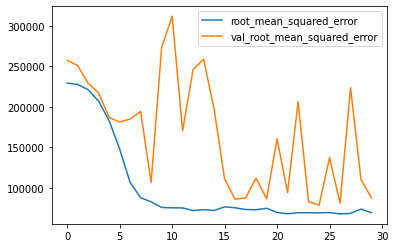

In [19]:
hy[['root_mean_squared_error','val_root_mean_squared_error']].plot()

In [20]:
final_model.evaluate(x_eval,y_eval)

107/107 [==============================] - 1s 6ms/step - loss: 6199229440.0000 - root_mean_squared_error: 78735.1875 - mean_absolute_error: 61006.8750


[6199229440.0, 78735.1875, 61006.875]

In [22]:
hy.to_csv(f'{date}_ResidualMLP_NAS_Simple_Regression_Ca_Housing.csv')
hy.to_json(f'{date}_ResidualMLP_NAS_Simple_Regression_Ca_Housing.json')